# Uvod v verjetnost in statistiko
V tem zvezku se bomo poigrali z nekaterimi koncepti, o katerih smo že prej razpravljali. Številni koncepti iz verjetnosti in statistike so dobro zastopani v glavnih knjižnicah za obdelavo podatkov v Pythonu, kot sta `numpy` in `pandas`.


In [117]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Naključne spremenljivke in porazdelitve
Začnimo z vzorčenjem 30 vrednosti iz enakomerne porazdelitve od 0 do 9. Prav tako bomo izračunali povprečje in varianco.


In [118]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [0, 8, 1, 0, 7, 4, 3, 3, 6, 7, 1, 0, 6, 3, 1, 5, 9, 2, 4, 2, 5, 6, 8, 7, 1, 9, 8, 2, 3, 7]
Mean = 4.266666666666667
Variance = 8.195555555555556


Za vizualno oceno, koliko različnih vrednosti je v vzorcu, lahko narišemo **histogram**:


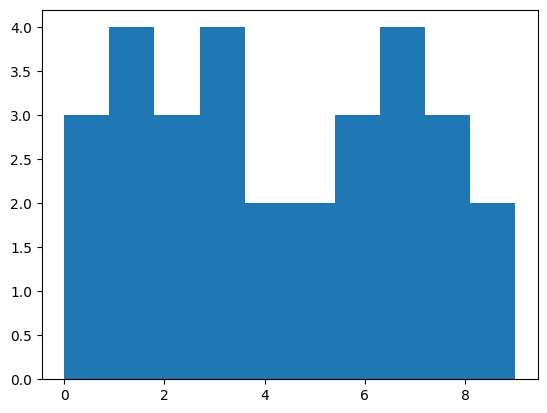

In [119]:
plt.hist(sample)
plt.show()

## Analiza resničnih podatkov

Povprečje in varianca sta zelo pomembna pri analizi podatkov iz resničnega sveta. Naložimo podatke o igralcih baseballa iz [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights)


In [120]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])
df


Empty DataFrame
Columns: [Name, Team, Role, Weight, Height, Age]
Index: []


Uporabljamo paket, imenovan [**Pandas**](https://pandas.pydata.org/) za analizo podatkov. O Pandas in delu s podatki v Pythonu bomo govorili več kasneje v tem tečaju.

Izračunajmo povprečne vrednosti za starost, višino in težo:


In [121]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    201.726306
Weight     73.697292
dtype: float64

Zdaj se osredotočimo na višino in izračunajmo standardni odklon in varianco:


In [122]:
print(list(df['Height'])[:20])

[180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 197, 189, 185, 219]


In [123]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.72630560928434
Variance = 441.6355706557866
Standard Deviation = 21.01512718628623


Poleg povprečja je smiselno pogledati tudi mediano in kvartile. Te lahko prikažemo z uporabo **škatlastega diagrama**:


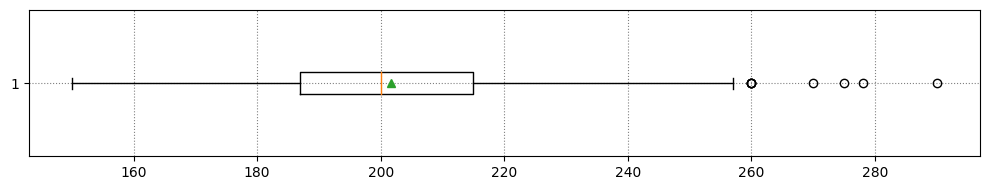

In [124]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

Lahko naredimo tudi škatlaste diagrame podmnožic našega nabora podatkov, na primer, razvrščenih po vlogi igralca.


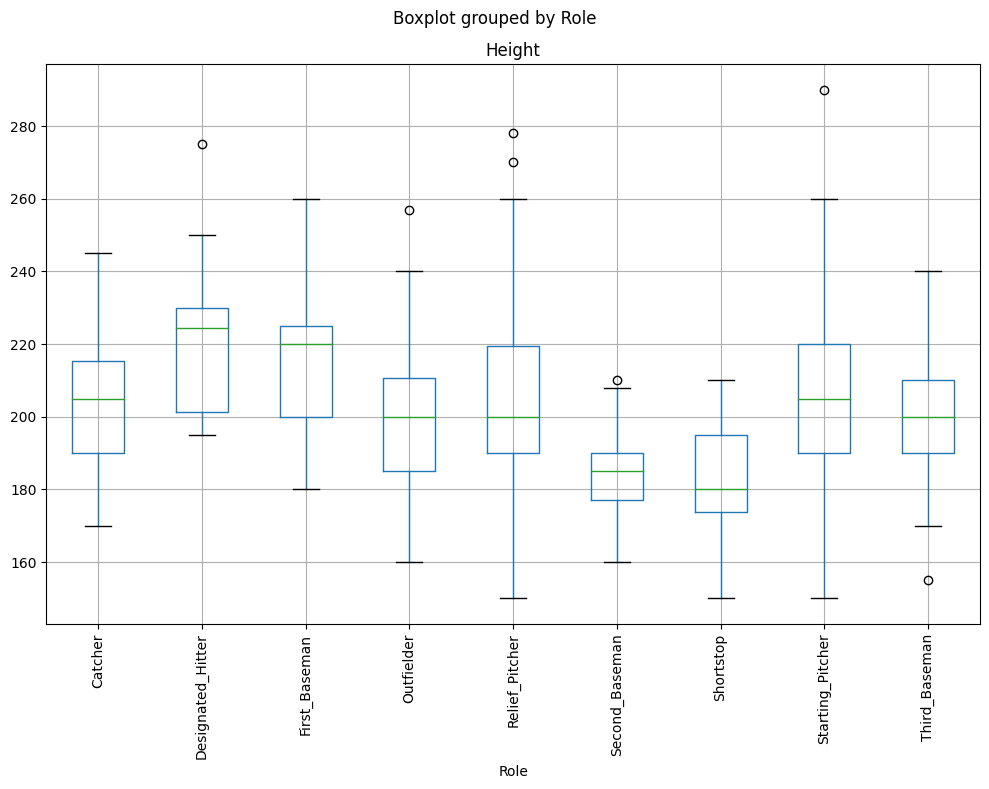

In [125]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **Opomba**: Ta diagram nakazuje, da so povprečne višine igralcev na prvi bazi višje od višin igralcev na drugi bazi. Kasneje bomo spoznali, kako lahko to hipotezo bolj formalno preverimo in kako pokažemo, da so naši podatki statistično pomembni za dokazovanje tega.

Starost, višina in teža so vse zvezne naključne spremenljivke. Kaj menite, kakšna je njihova porazdelitev? Dober način, da to ugotovimo, je, da narišemo histogram vrednosti:


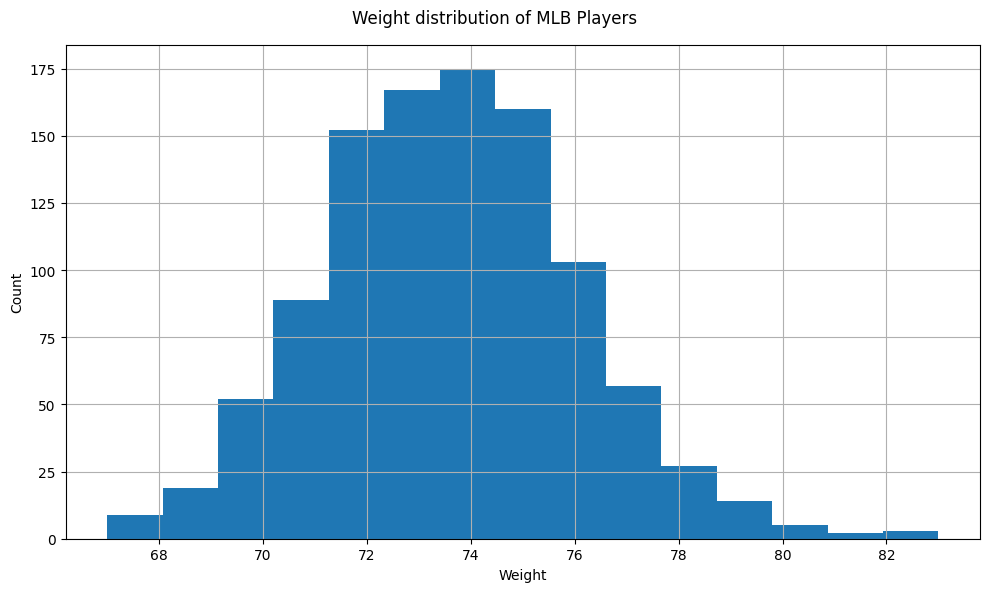

In [126]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Normalna porazdelitev

Ustvarimo umetni vzorec tež, ki sledi normalni porazdelitvi z enakim povprečjem in varianco kot naši dejanski podatki:


In [127]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([183.05261872, 193.52828463, 154.73707302, 204.27140391,
       203.88907247, 213.74665656, 225.10092364, 171.75867917,
       204.3521425 , 207.52870255, 158.53001756, 240.94399197,
       189.9909742 , 180.72442994, 173.4393402 , 175.98883711,
       197.86092769, 188.61598821, 234.19796698, 209.0295457 ])

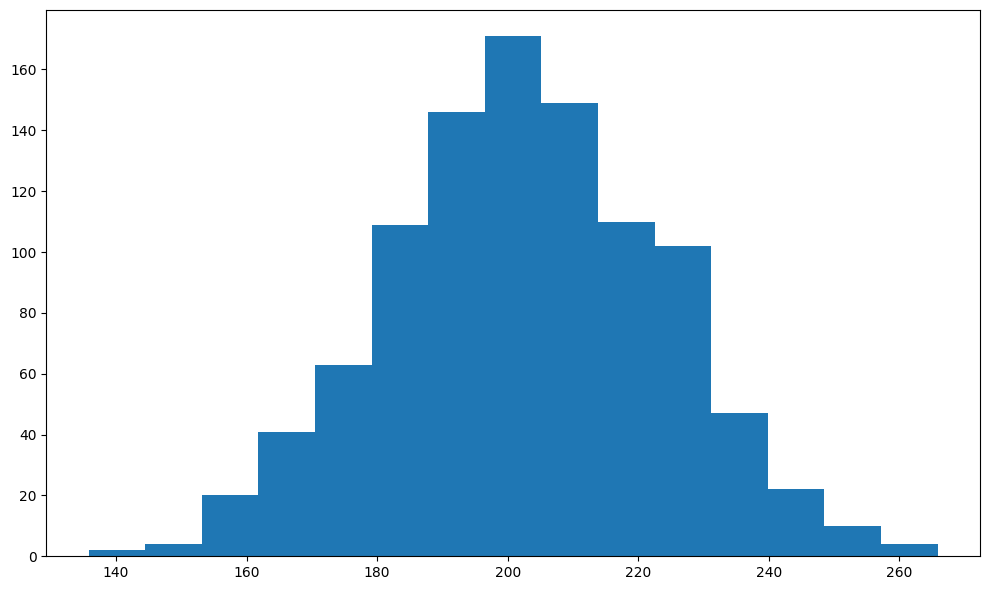

In [128]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

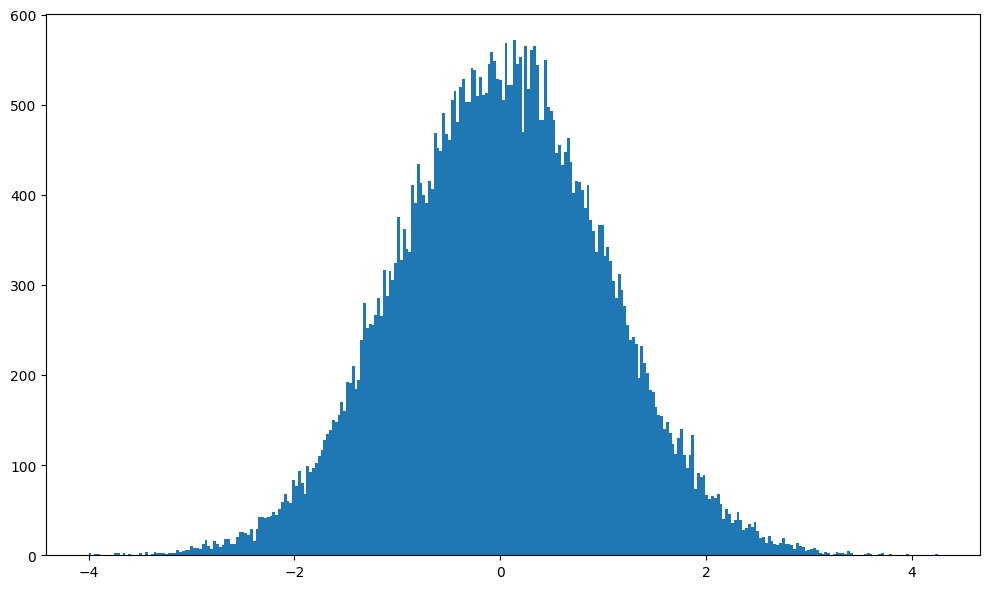

In [129]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

Ker je večina vrednosti v resničnem življenju normalno porazdeljenih, ne bi smeli uporabljati enakomernega generatorja naključnih števil za ustvarjanje vzorčnih podatkov. Tukaj je, kaj se zgodi, če poskušamo generirati teže z enakomerno porazdelitvijo (ustvarjeno z `np.random.rand`):


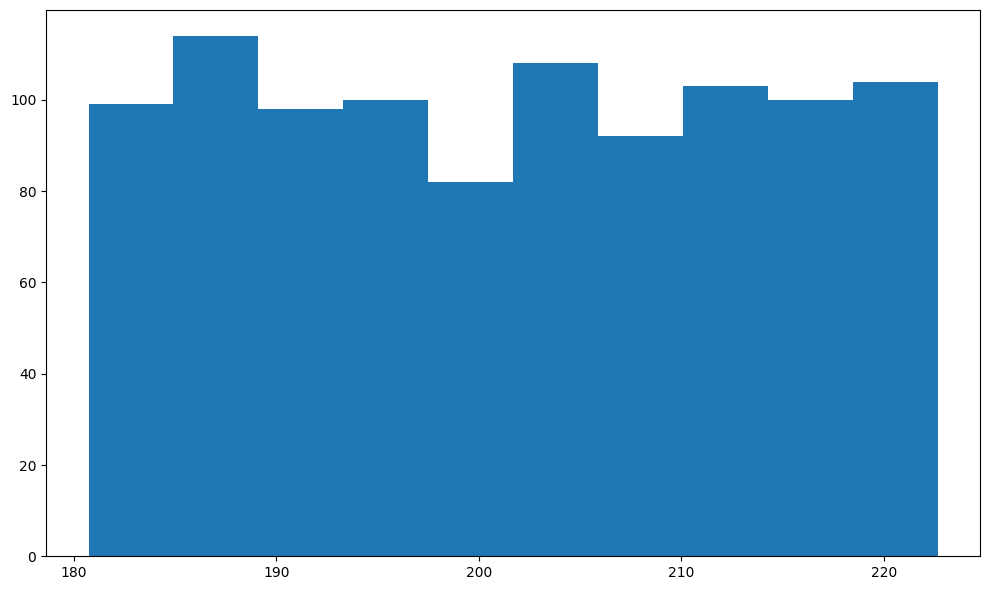

In [130]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## Intervali zaupanja

Zdaj bomo izračunali intervale zaupanja za teže in višine igralcev baseballa. Uporabili bomo kodo [iz te razprave na stackoverflow](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data):


In [131]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 73.70 ± 0.10
p=0.90, mean = 73.70 ± 0.12
p=0.95, mean = 73.70 ± 0.14


## Preizkušanje hipotez

Raziščimo različne vloge v našem naboru podatkov o igralcih baseballa:


In [132]:
df.groupby('Role').agg({ 'Weight' : 'mean', 'Height' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

Weight      Height  Count
Role                                           
Catcher            72.723684  204.328947     76
Designated_Hitter  74.222222  220.888889     18
First_Baseman      74.000000  213.109091     55
Outfielder         73.010309  199.113402    194
Relief_Pitcher     74.374603  203.517460    315
Second_Baseman     71.362069  184.344828     58
Shortstop          71.903846  182.923077     52
Starting_Pitcher   74.719457  205.321267    221
Third_Baseman      73.044444  200.955556     45

Preverimo hipotezo, da so prvi igralci na bazi višji od drugih igralcev na bazi. Najenostavnejši način za to je preveriti intervale zaupanja:


In [133]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36..216.86, 2nd basemen height: 182.24..186.45
Conf=0.90, 1st basemen height: 208.82..217.40, 2nd basemen height: 181.93..186.76
Conf=0.95, 1st basemen height: 207.97..218.25, 2nd basemen height: 181.45..187.24


Vidimo, da se intervali ne prekrivajo.

Statistično bolj pravilna metoda za dokazovanje hipoteze je uporaba **Studentovega t-testa**:


In [134]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


Dve vrednosti, ki jih vrne funkcija `ttest_ind`, sta:
* p-vrednost lahko razumemo kot verjetnost, da imata dve porazdelitvi enako povprečje. V našem primeru je zelo nizka, kar pomeni, da obstajajo močni dokazi, ki podpirajo trditev, da so prvi igralci na bazi višji.
* t-vrednost je vmesna vrednost normalizirane razlike povprečij, ki se uporablja v t-testu, in se primerja s pragovno vrednostjo za določeno stopnjo zaupanja.


## Simulacija normalne porazdelitve s pomočjo centralnega limitnega izreka

Psevdonaključni generator v Pythonu je zasnovan tako, da nam daje enakomerno porazdelitev. Če želimo ustvariti generator za normalno porazdelitev, lahko uporabimo centralni limitni izrek. Za pridobitev vrednosti z normalno porazdelitvijo bomo preprosto izračunali povprečje vzorca, generiranega z enakomerno porazdelitvijo.


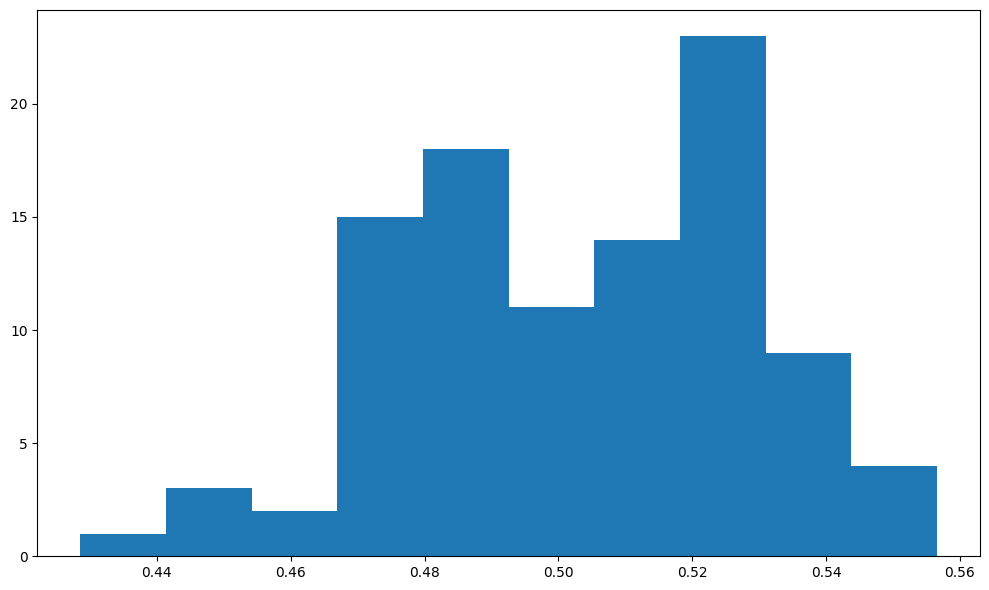

In [135]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## Korelacija in Zlobna Baseball Korporacija

Korelacija nam omogoča iskanje povezav med podatkovnimi sekvencami. V našem preprostem primeru si predstavljajmo, da obstaja zlobna baseball korporacija, ki plačuje svoje igralce glede na njihovo višino - višji kot je igralec, več denarja prejme. Predpostavimo, da je osnovna plača 1000 $, z dodatnim bonusom od 0 $ do 100 $, odvisno od višine. Vzeli bomo prave igralce iz MLB in izračunali njihove namišljene plače:


In [136]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180, 1033.985209531635), (215, 1073.6346206518763), (210, 1067.9704190632704), (210, 1067.9704190632704), (188, 1043.0479320734046), (176, 1029.4538482607504), (209, 1066.837578745549), (200, 1056.6420158860585), (231, 1091.760065735415), (180, 1033.985209531635)]


Izračunajmo zdaj kovarianco in korelacijo teh zaporedij. `np.cov` nam bo dal tako imenovano **kovariančno matriko**, ki je razširitev kovariance na več spremenljivk. Element $M_{ij}$ kovariančne matrike $M$ je korelacija med vhodnima spremenljivkama $X_i$ in $X_j$, diagonalne vrednosti $M_{ii}$ pa predstavljajo varianco $X_{i}$. Podobno nam bo `np.corrcoef` dal **korelacijsko matriko**.


In [137]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[441.63557066 500.30258018]
 [500.30258018 566.76293389]]
Covariance = 500.3025801786725
Correlation = 0.9999999999999997


Korelacija, enaka 1, pomeni, da obstaja močna **linearna povezava** med dvema spremenljivkama. Linearno povezavo lahko vizualno opazimo z risanjem ene vrednosti proti drugi:


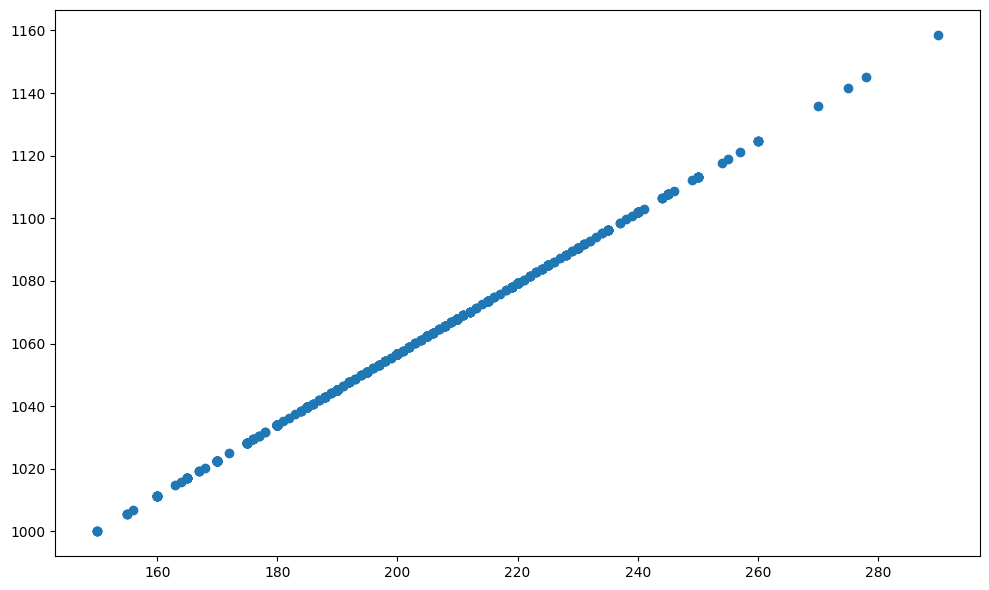

In [138]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

Poglejmo, kaj se zgodi, če razmerje ni linearno. Recimo, da se je naše podjetje odločilo skriti očitno linearno odvisnost med višino in plačami ter je v formulo uvedlo nekaj nelinearnosti, kot je `sin`:


In [139]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9910655775558532


V tem primeru je korelacija nekoliko manjša, vendar je še vedno precej visoka. Zdaj, da bi bila povezava še manj očitna, bi morda želeli dodati nekaj dodatne naključnosti z dodajanjem neke naključne spremenljivke k plači. Poglejmo, kaj se zgodi:


In [140]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.948230287835537


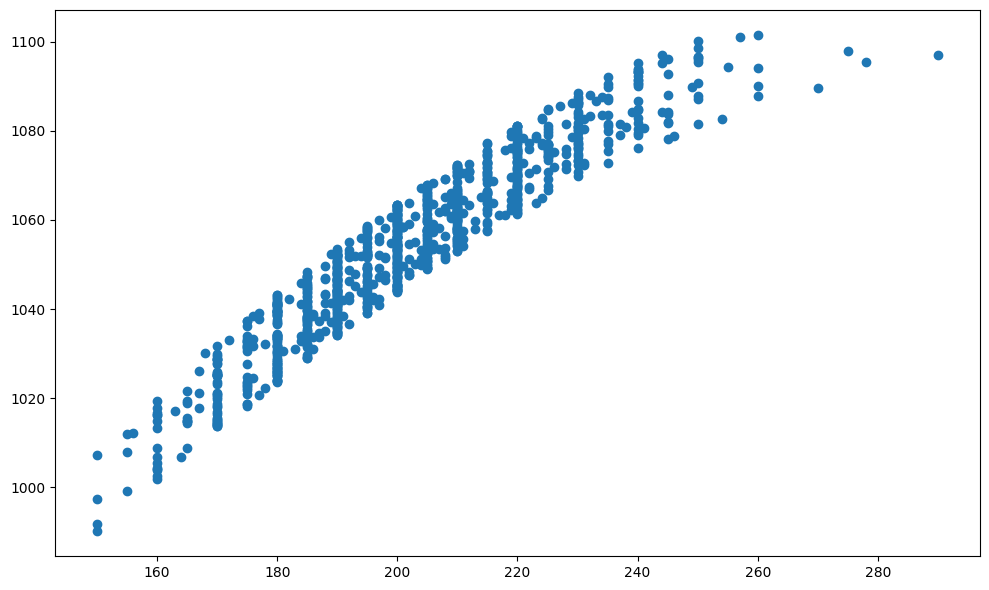

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

Ali lahko uganeš, zakaj se pike poravnajo v navpične črte na ta način?

Opazili smo povezavo med umetno ustvarjenim konceptom, kot je plača, in opazovano spremenljivko *višina*. Poglejmo še, ali se dve opazovani spremenljivki, kot sta višina in teža, med seboj povezujeta:


In [142]:
np.corrcoef(df['Height'],df['Weight'])

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

Na žalost nismo dobili nobenih rezultatov – le nekaj nenavadnih vrednosti `nan`. To je posledica dejstva, da so nekatere vrednosti v naši seriji nedefinirane, predstavljene kot `nan`, kar povzroči, da je rezultat operacije prav tako nedefiniran. Če pogledamo matriko, lahko vidimo, da je stolpec `Weight` problematičen, saj je bila izračunana samokorelacija med vrednostmi `Height`.

> Ta primer prikazuje pomen **priprave podatkov** in **čiščenja podatkov**. Brez ustreznih podatkov ne moremo izračunati ničesar.

Uporabimo metodo `fillna`, da zapolnimo manjkajoče vrednosti, in izračunajmo korelacijo:


In [143]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

Dejansko obstaja korelacija, vendar ne tako močna kot v našem umetnem primeru. Če pogledamo razpršeni diagram ene vrednosti v primerjavi z drugo, bi bila povezava veliko manj očitna:


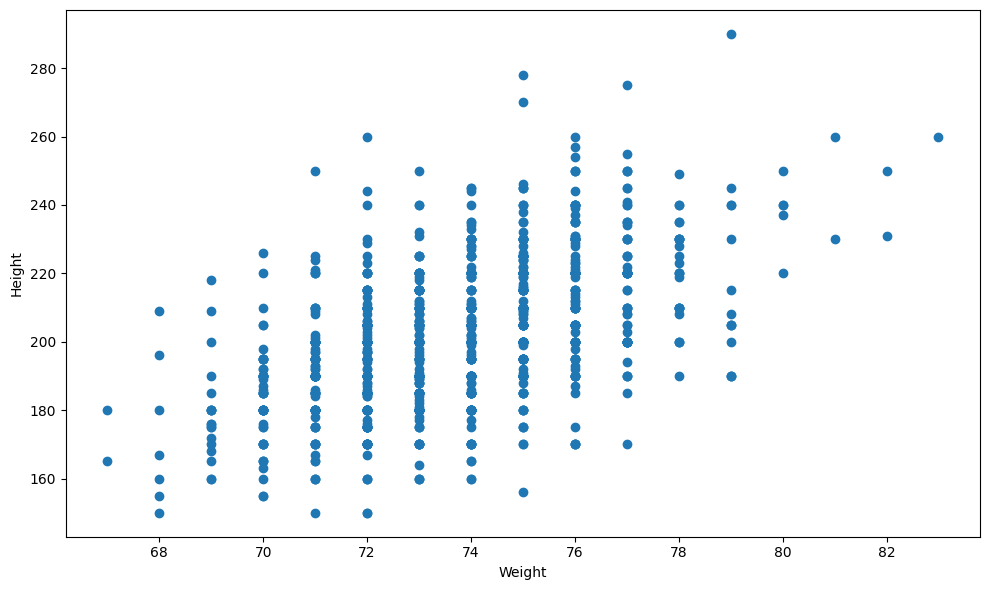

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

## Zaključek

V tem zvezku smo se naučili, kako izvajati osnovne operacije na podatkih za izračun statističnih funkcij. Zdaj vemo, kako uporabiti zanesljiv nabor matematičnih in statističnih orodij za preverjanje nekaterih hipotez ter kako izračunati intervale zaupanja za poljubne spremenljivke na podlagi vzorca podatkov.



---

**Omejitev odgovornosti**:  
Ta dokument je bil preveden z uporabo storitve za strojno prevajanje [Co-op Translator](https://github.com/Azure/co-op-translator). Čeprav si prizadevamo za natančnost, vas prosimo, da upoštevate, da lahko avtomatizirani prevodi vsebujejo napake ali netočnosti. Izvirni dokument v njegovem izvirnem jeziku je treba obravnavati kot avtoritativni vir. Za ključne informacije priporočamo strokovno človeško prevajanje. Ne prevzemamo odgovornosti za morebitna nesporazumevanja ali napačne razlage, ki izhajajo iz uporabe tega prevoda.
